In [1]:
import xarray as xr
import numpy as np


In [9]:
def create_numpy_dataset(file_name_moorings, file_name_umo, temporal_resample = None):
    
    ## Loading the mooring data to create a numpy array out of it.
    ds_pos = xr.open_dataset(f'../rapid-geostrophic-reconstruction/data/{file_name_moorings}.nc')

    ds_pos = ds_pos.resample(time = temporal_resample).mean()
    numpy_values = ds_pos.rho.sel(pos = ['west', 'marwest', 'mareast', 'east']).stack(feature=('pos', 'z')).fillna(0).data
    numpy_time = ds_pos.time.data
    numpy_z = ds_pos.z.data

    t_umo = xr.open_dataset(f'../rapid-geostrophic-reconstruction/data/{file_name_umo}.nc').resample(time = temporal_resample).mean()
    numpy_umo = t_umo.sel(time = ds_pos.time, method='nearest').dv_dz_times_X.data
    np.savez(f'../rapid-geostrophic-reconstruction/data/learning/{file_name_moorings}_{file_name_umo}_{temporal_resample}.npz', numpy_values=numpy_values, numpy_time=numpy_time, numpy_z=numpy_z, numpy_umo=numpy_umo)


In [12]:
create_numpy_dataset('ds_pos_obs_std', 't_umo_obs', temporal_resample='10D')
create_numpy_dataset('ds_pos_sim_miss_std', 't_umo_sim_miss', temporal_resample='10D')

## ARGO dataset

In [16]:
from pathlib import Path

path = Path('data/raw/argo_25N_30N_10W_81W_alldepth_alltime/')
list_of_files = list(path.glob('GL_PR_PF_*.nc'))



In [126]:
from xarray import open_dataset

ds_argo = open_dataset(list_of_files[-390])
ds_argo

<xarray.Dataset>
Dimensions:                   (TIME: 167, LATITUDE: 167, LONGITUDE: 167,
                               POSITION: 167, DEPTH: 61)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2002-03-25T18:39:10 ... 2...
  * LATITUDE                  (LATITUDE) float32 27.52 27.49 ... 29.01 29.33
  * LONGITUDE                 (LONGITUDE) float32 -42.24 -42.44 ... -55.31 -55.5
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/17)
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    ...                        ...
    TEMP_ADJUSTED             (TIME, DEPTH) float64 ...
    TEMP_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    PSAL                      (TIME, DEPTH) float64 ...
    PSAL_QC                   (TIME, DEPTH) float32 ...
    PSAL_ADJUSTED             (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  4900213
    institution:                    SHOM Service Hydrographique et Oceanograp...
    institution_edmo_code:          540
    site_code:                       
    ...                             ...
    last_date_observation:          2006-10-10T15:23:55Z
    last_latitude_observation:      29.32700
    last_longitude_observation:     -55.50200
    date_update:                    2023-08-07T08:29:35Z
    history:                        2023-08-07T08:29:35Z : Creation
    data_mode:                      M

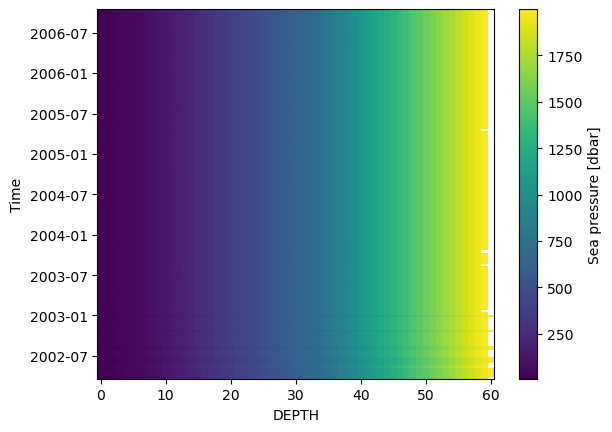

In [127]:
ds_argo.PRES

array([ 1.,  1., nan,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.], dtype=float32)

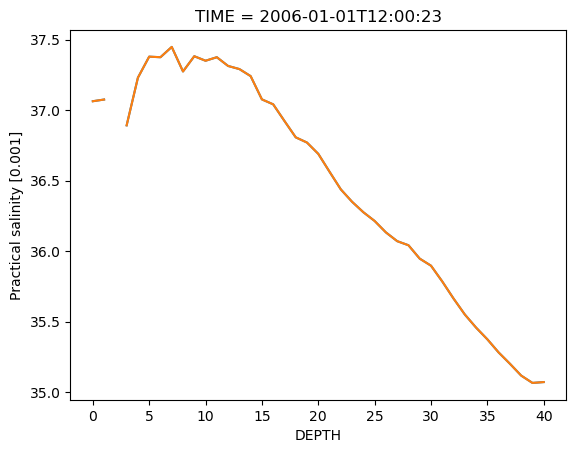

In [106]:
import hvplot.xarray
ds_argo.PSAL_ADJUSTED.isel(TIME = 1).plot()
ds_argo.PSAL.isel(TIME = 1).plot()

ds_argo.TEMP_QC.isel(TIME = 1).data

In [23]:
times = []

for file in list_of_files:
    ds = open_dataset(file)
    times.append(ds.TIME.data)

In [24]:
times

[array(['2015-05-14T20:26:00.000000000', '2015-05-14T20:26:00.000000000',
        '2015-05-24T20:14:00.000000000', '2015-05-24T20:14:00.000000000'],
       dtype='datetime64[ns]'),
 array(['2012-10-31T15:42:09.000000000', '2012-11-08T15:57:40.000000000',
        '2013-02-20T15:48:15.000000000', '2013-02-28T15:23:09.000000000',
        '2013-03-07T15:37:40.999999744', '2013-03-09T10:01:22.000000000',
        '2013-03-10T10:07:08.000000000', '2013-03-11T10:17:18.000000000',
        '2013-03-12T10:04:20.000000000', '2013-03-13T10:17:05.000000000',
        '2013-03-14T10:17:11.000000000', '2013-03-15T10:24:35.000000000',
        '2013-03-16T10:13:08.000000000', '2013-03-17T10:08:47.000000000',
        '2013-03-18T10:13:39.000000256', '2013-03-19T10:09:34.000000000',
        '2013-03-20T10:27:48.000000000', '2013-03-21T10:13:11.000000000',
        '2013-03-22T10:07:39.000000000'], dtype='datetime64[ns]'),
 array(['2018-06-27T05:35:00.000000256', '2018-06-27T05:35:00.000000256',
        '201

In [50]:
import pandas as pd

t_series = pd.Series(np.concatenate(times), name='time')

In [45]:
# group this series of timestamps into 10 day intervals
import hvplot.pandas
t_series.dt.floor('D').value_counts().hvplot.hist()

:Histogram   [count]   (count_count)

In [51]:
t_series.set_index('name')#.resample('90D')

AttributeError: 'Series' object has no attribute 'set_index'

In [70]:

pd.DataFrame(np.array([t_series, np.ones_like(t_series)]).T, columns=['time', 'o']).set_index('time').resample('1D').count().hvplot()

/gxfs_home/geomar/smomw507/.conda/envs/amoc_recons/lib/python3.9/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/gxfs_home/geomar/smomw507/.conda/envs/amoc_recons/lib/python3.9/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [time]   (o)

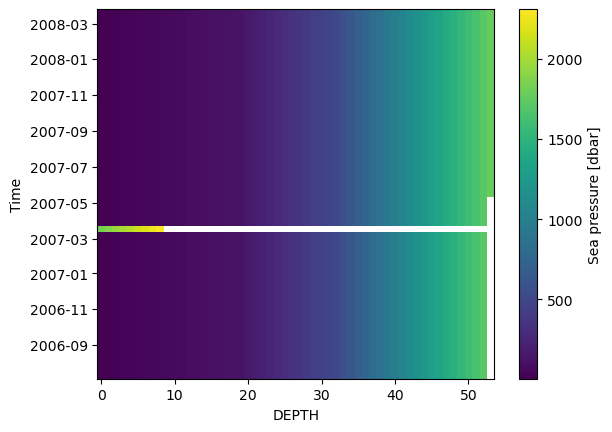

In [117]:
ds_argo.

In [128]:
ds_argo = open_dataset(list_of_files[-300])
ds_argo["TIME"] = ds_argo.TIME.dt.floor('D')

ds_argo = ds_argo.assign_coords(PRES = ds_argo.PRES)


ds_argo.TEMP.interp(PRES = np.arange(0, 2000, 10))

ValueError: Dimensions {'PRES'} do not exist. Expected one or more of Frozen({'TIME': 52, 'DEPTH': 54})

In [77]:
np.concatenate(times)

AttributeError: 'numpy.ndarray' object has no attribute 'to_dataframe'

In [79]:
times = []

for file in list_of_files:
    ds = open_dataset(file)

    ds["TIME"] = ds.TIME.dt.floor('D')
    

    times.append(ds.TIME.data)


unique_times, counts = np.unique(np.concatenate(times), return_counts=True)

max_count = counts.max()


print(max_count )

41


In [129]:
for t_i in ds_argo.TIME.shape[0]:

    ds_argo.TEMP.isel(TIME = t_i)

52

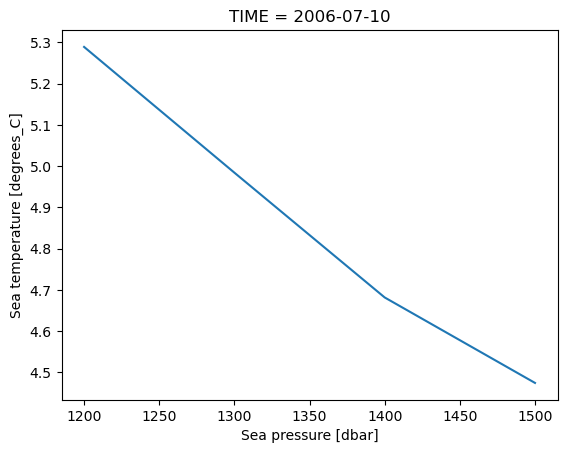

In [146]:
ds_argo.isel(TIME = 0).drop_vars('PRES').assign_coords(DEPTH = ds_argo.PRES.isel(TIME = 0)).dropna('DEPTH').interp(DEPTH = [1200, 1300,1400,1500]).TEMP.plot()